<a href="https://colab.research.google.com/github/HanSeongHun/KBO/blob/main/KBO_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from matplotlib import font_manager, rc

In [ ]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt

In [ ]:
# if platform.system() == 'Windows' :
#   #윈도우인 경우 맑은 고딕 폰트 이용
#   font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()

# else:
#   #맥인 경우
#   plt.rc('font', family = 'AppleGothic')

# #그래프에서 마이너스 기호가 표시되게 하는 설정
# matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
#프리시즌 데이터 로드
preseason_df = pd.read_csv('/content/drive/MyDrive/Data_study/KBO_data/Pre_Season_Batter.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv('/content/drive/MyDrive/Data_study/KBO_data/Regular_Season_Batter.csv')


In [ ]:
print(preseason_df.shape)

(1393, 29)


In [ ]:
display(preseason_df.head())

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [ ]:
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


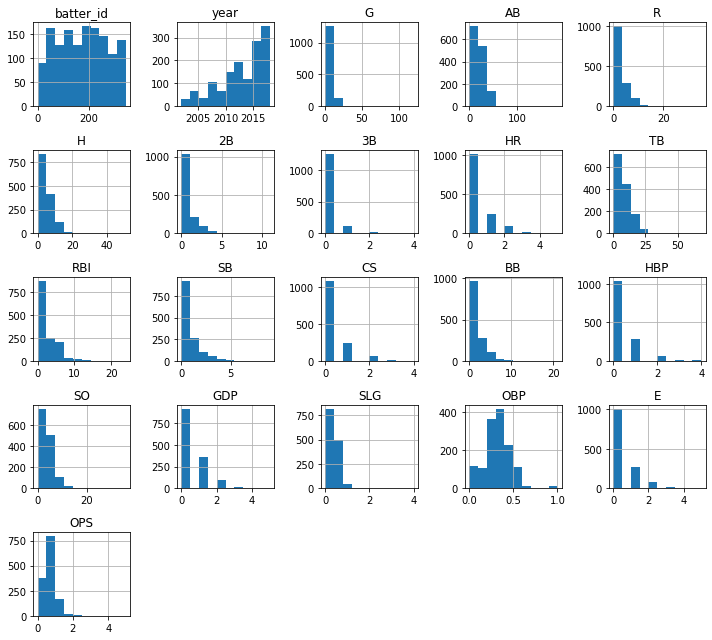

In [ ]:
preseason_df.hist(figsize=(10,9))
plt.tight_layout() #그래프 간격 설정
plt.show()

In [ ]:
#정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수 
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('reqular')

#프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

#concat은 두개의 Data_Frame을 합치는 것
# round는 소숫점 두자리까지
# axis = 0은 위아래로 병합, axis = 1 옆으로 병합

pd.concat([regular_count, preseason_count, np.round(preseason_count / regular_count,2).rename('ratio')], axis = 1).transpose().loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
reqular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [ ]:
# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)

preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))


In [ ]:
# 교집합에 존재한 데이터만 불러오기
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x : x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop= True)

# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x : x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop= True)

# 검정 코드
print(regular_season_new.shape,preseason_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])

(1358, 30) (1358, 30)


1358

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: Runt

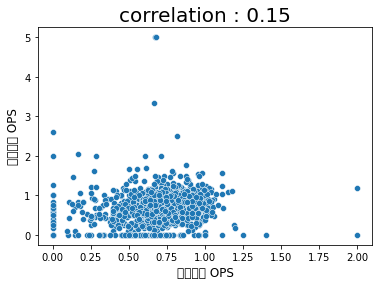

In [ ]:
#정규시즌과 프리시즌의 상관관계 계산
# 0.15로 정규시즌과 프리시즌과의 상관관계는 거의 없다고 할 수 있다. > 데이터 분석에서 프리시즌 데이터를 분석에서 제외한다.
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation : ' + str(np.round(correlation,2)), fontsize = 20)
plt.xlabel("정규시즌 OPS", fontsize = 12)
plt.ylabel("프리시즌 OPS", fontsize = 12)
plt.show()

In [ ]:
regular_season_df = pd.read_csv('/content/drive/MyDrive/Data_study/KBO_data/Regular_Season_Batter.csv')
display(regular_season_df.shape, regular_season_df.head(),regular_season_df.describe())
# 29 features, 2454 datas


(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


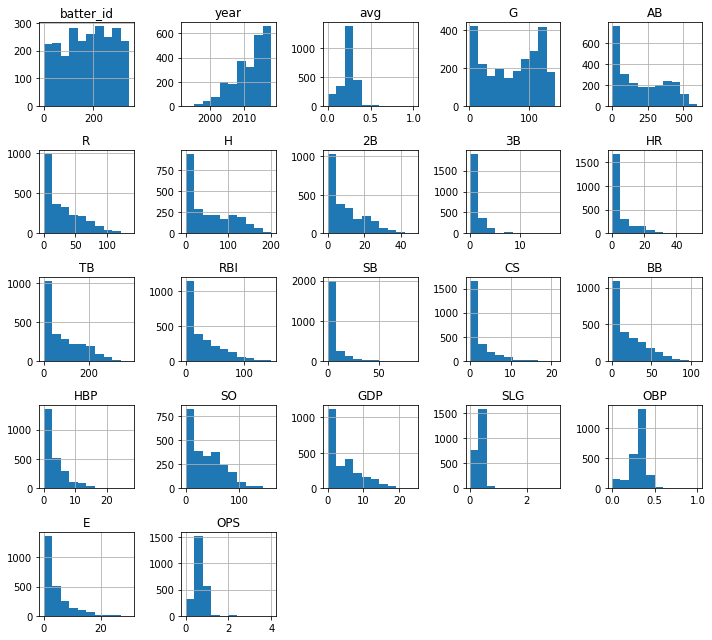

In [ ]:
regular_season_df.hist(figsize=(10,9))
plt.tight_layout() #그래프 간격 설정
plt.show()

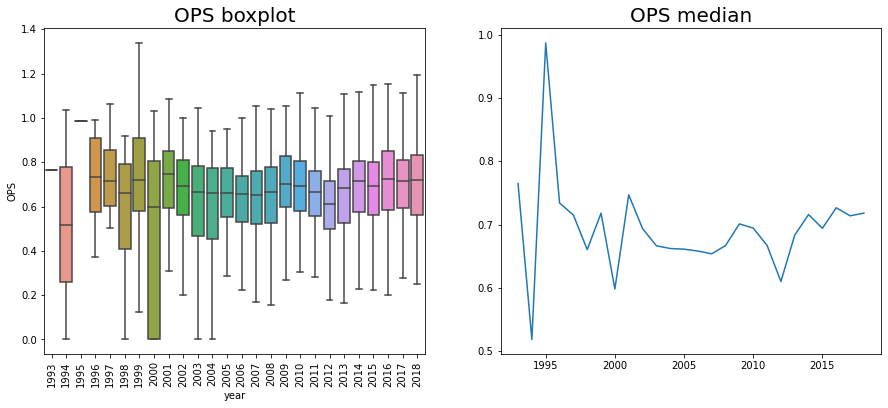

In [ ]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행 1열) 그래프
g = sns.boxplot(x = 'year', y = 'OPS' , data = regular_season_df, showfliers = False)
g.set_title ('OPS boxplot', size =20)
g.set_xticklabels(g.get_xticklabels(),rotation = 90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('OPS median', size = 20)
plt.show()

In [ ]:
pd.crosstab(regular_season_df['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,54,68,73,85,98,115,124,130,151,174,194,186,207,213,217,227


OPS가 2000년대 이전에는 큰 변동이 있지만 그 이후에는 크지않다. 2000년 이전에는 데이터가 부족함을 확인할 수 있다.그것 때문에 변동폭이 컸던 것일 수도 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_

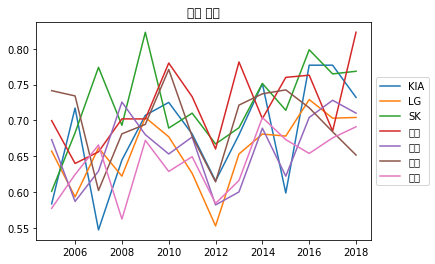

In [ ]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns= 'year', values= 'OPS', aggfunc='median')

# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis = 1) <= 0

plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns,loc = 'center left', bbox_to_anchor = (1,0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('팀별 성적')
plt.show()

신생팀이 아닌, 과거에 데이터를 갖고있는 팀들을 대상으로 연도별 팀 성적을 비교 -> 성적이 계속 변화되고 순위도 변동이 있다.

## 키와 몸무게의 성적 연관성

In [ ]:
import re

# 무게 index 생성
regular_season_df['weight'] = regular_season_df['height/weight'].apply(lambda x : int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

# 키 index 생성
regular_season_df['height'] = regular_season_df['height/weight'].apply(lambda x : int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'], regular_season_df['weight'])

177cm/93kg 0       177.0
1       180.0
2       180.0
3       180.0
4       180.0
        ...  
2449    181.0
2450    181.0
2451    181.0
2452    181.0
2453    181.0
Name: height, Length: 2454, dtype: float64 0       93.0
1       72.0
2       72.0
3       72.0
4       72.0
        ... 
2449    82.0
2450    82.0
2451    82.0
2452    82.0
2453    82.0
Name: weight, Length: 2454, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/p

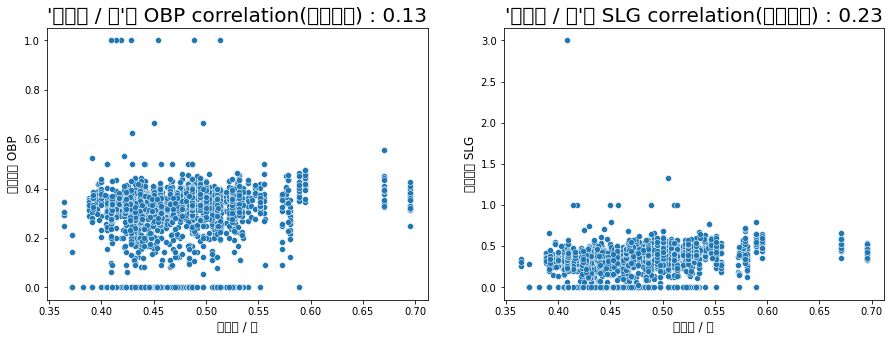

In [ ]:
# 몸무게 / 키 -> 이 값이 크면 무게가 많이 나가는 것
# 낮으면 빠르고 높으면 힘이 강하다 -> 작으면 출루율 상승, 크면 장타율 상승

regular_season_df['weight per height'] = regular_season_df['weight'] / regular_season_df['height']

plt.figure(figsize = (15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫번째 그래프

# 정규시즌과 프리시즌의 OBP 상관관계 계산
correlation = regular_season_df['weight per height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight per height'], regular_season_df['OBP'])

plt.title("'몸무게 / 키'와 OBP correlation(상관관계) : " + str(np.round(correlation,2)), fontsize = 20)
plt.ylabel('정규시즌 OBP' , fontsize = 12)
plt.xlabel('몸무게 / 키', fontsize = 12)

# SLG 상관관계
plt.subplot(1,2,2)

correlation = regular_season_df['weight per height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight per height'], regular_season_df['SLG'])

plt.title("'몸무게 / 키'와 SLG correlation(상관관계) : " + str(np.round(correlation,2)), fontsize = 20)
plt.ylabel('정규시즌 SLG' , fontsize = 12)
plt.xlabel('몸무게 / 키', fontsize = 12)
plt.show()

몸무게와 키는 장타율이나 출루율에는 크게 영향을 미치지않는다.

In [ ]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
내야수(우투양타)      7
외야수(우투양타)      7
Name: position, dtype: int64

In [ ]:
# position
regular_season_df['pos'] = regular_season_df['position'].apply(lambda x : x.split('(')[0] if pd.notnull(x) else x)

# 우타,좌타,양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(lambda x : x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


수비 포지션과 왼손잡이인지 오른손 잡이인지 구분


Text(0.5, 1.0, '타석방향별 OPS')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_

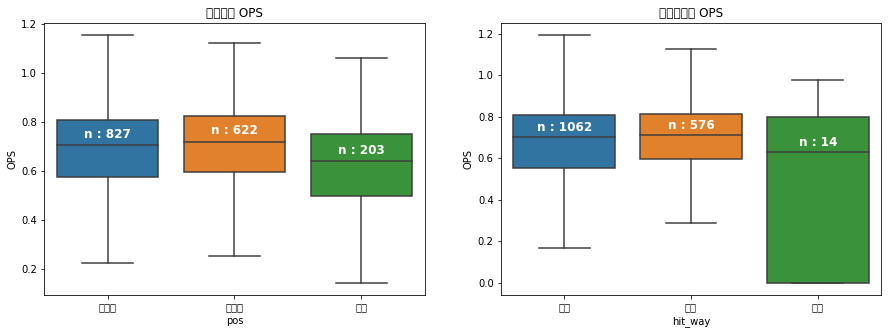

In [ ]:
plt.figure(figsize = (15,5)) # 그래프 크기 조정
plt.subplot(1,2,1)
ax = sns.boxplot(x= 'pos', y = 'OPS', data = regular_season_df, showfliers = False)

# position별 OPS 중앙값 -> dict 변환
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs : nobs[key] = "n : " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()),medians[label.get_text()] + 0.03, nobs[label.get_text()], horizontalalignment = 'center', size = 'large', color = 'w', weight = 'semibold')

ax.set_title('포지션별 OPS')

plt.subplot(1,2,2)

ax = sns.boxplot(x='hit_way', y = 'OPS', data = regular_season_df, showfliers = False)

# 타자 방향별 OPS 중앙값 -> dict로 변환
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()

# 타자 방향 관ㄴ측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs : nobs[key] = "n : " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()),medians[label.get_text()] + 0.03, nobs[label.get_text()], horizontalalignment = 'center', size = 'large', color = 'w', weight = 'semibold')

ax.set_title('타석방향별 OPS')


내야수와 외야수는 큰 차이가 없지만 포수는 조금 뒤처지는 모습을 보인다.


## 외국인 선수

In [ ]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [ ]:
# split
foreign_country = regular_season_df['career'].apply(lambda x : x.replace('-', ' ').split(' ')[0])

# 외국인만 추출
foreign_country_list = list(set(foreign_country.apply(lambda x : np.nan if '초' in x else x)))

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['네덜란드', '캐나다', '미국', '쿠바', '도미니카']

In [ ]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(lambda x : x if pd.isnull(x) else ('foreign' if x in foreign_country_list else 'korean'))

regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


Text(0.5, 1.0, '국적별 OPS')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text

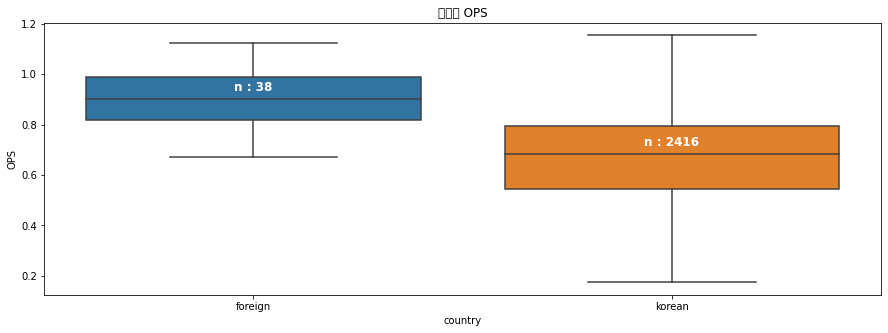

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(x='country', y = 'OPS', data = regular_season_df, showfliers = False)

# 타자 방향별 OPS 중앙값 -> dict로 변환
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()

# 타자 방향 관ㄴ측치 수
nobs = regular_season_df['country'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs : nobs[key] = "n : " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()),medians[label.get_text()] + 0.03, nobs[label.get_text()], horizontalalignment = 'center', size = 'large', color = 'w', weight = 'semibold')

ax.set_title('국적별 OPS')

외국인 선수들이 내국인 선수들보다 성적이 좋은 경향을 보인다.

## 첫 연봉

In [ ]:
regular_season_df['starting_salary'][0]

nan

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '정규시즌 OPS')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_

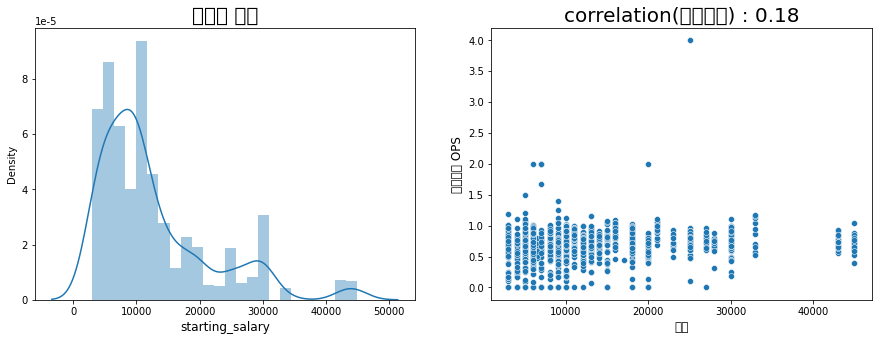

In [ ]:
# 결측치는 그대로 0 '만원'이 포함되어 있다면 숫자만 뽑아서 초봉으로
# 만원 단위가 아니면 초봉은 결측치로 처리
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(lambda x : x if pd.isnull(x) else (int(re.findall('\d+', x)[0]) if '만원' in x else np.nan))

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)

b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()], hist = True)
b.set_xlabel("starting_salary", fontsize = 12)
b.set_title('초봉의 분포', fontsize = 20)

plt.subplot(1,2,2)

#정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation(상관관계) : ' + str(np.round(correlation,2)), fontsize = 20)
b.set_xlabel("초봉", fontsize = 12)
b.set_ylabel("정규시즌 OPS", fontsize = 12)


현재 본 데이터들은 OPS와 연관이 있는 변수가 거의 없다.
다른 접근법이 필요하다

## 일별 데이터 분석

In [ ]:
day_by_day_df = pd.read_csv('/content/drive/MyDrive/Data_study/KBO_data/Regular_Season_Batter_Day_by_Day_b4.csv')

In [ ]:
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [ ]:
#date를 월과 일로 저장
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x : str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산
# 연도에서 월별로 avg2 
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()

# pivot_table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index=['month'], columns = 'year', values = 'avg2')


In [ ]:
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


Text(0.5, 1.0, '연도별 평균 타율')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

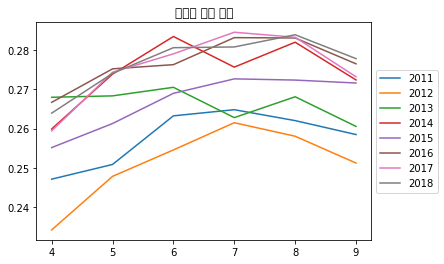

In [ ]:
# 최근 연도, 결측치 제거
display(agg_df.iloc[2:,10:])

plt.plot(agg_df.iloc[2:,10:]) # 2011년 ~ 2018년 데이터만 이용
plt.legend(agg_df.iloc[2:,10:].columns, loc = 'center left', bbox_to_anchor = (1,0.5)) # 범례 그래프 밖에 위치
plt.title('연도별 평균 타율')
